In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
hj = pd.read_excel("급속충전이용내역_한전_18.01-19.10.xlsx")
hj.head(5)

,번호,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36
1,2,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,12.86,2018-01-02 09:16:04
2,3,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,16.10,2018-01-04 14:00:49
3,4,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,13.94,2018-01-09 12:58:46
4,5,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,16.06,2018-01-09 20:48:46


In [4]:
hk = pd.read_excel("급속충전이용내역_환경부_18.01-19.10.xlsx")
hk.head(5)

,번호,충전소대분류,충전소명,주소,설치년도,충전기타입,충전량(kWh),충전시작시간,충전종료시간
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847
1,2,공공시설,중부지방고용노동청 별관 앞,인천광역시 남동구 구월3동 1111-6 중부지방고용노동청 별관 앞,2017,DC차데모+AC3상+DC콤보,2.05,20180101041556,20180101042036
2,3,주차시설,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,2017,DC차데모+AC3상+DC콤보,16.95,20180101043214,20180101050354
3,4,휴게시설,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,2017,DC차데모+AC3상+DC콤보,16.50,20180101051131,20180101054151
4,5,휴게시설,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,2017,DC차데모+AC3상+DC콤보,14.41,20180101074307,20180101081251


In [5]:
len(hj['충전소'].unique())

110

In [6]:
len(hk['충전소명'].unique())

59

In [7]:
#hj['충전소'].unique()

In [8]:
#hk['충전소명'].unique()

In [9]:
hj.isnull().sum()

번호          0
용도별         0
충전소         0
주소          0
충전소 구축일     0
충전구분        0
충전량(kWh)    0
시작일시        0
dtype: int64

In [10]:
hk.isnull().sum()

번호          0
충전소대분류      0
충전소명        0
주소          0
설치년도        0
충전기타입       0
충전량(kWh)    0
충전시작시간      0
충전종료시간      0
dtype: int64

In [11]:
len(set(hk['충전소명'].unique()) & set(hj['충전소'].unique()))

0

In [12]:
len(set(hk['충전소명'].unique()) | set(hj['충전소'].unique()))

169

In [13]:
hj['용도별'].unique()

array(['공용', '아파트용'], dtype=object)

In [14]:
hk['충전소대분류'].unique()

array(['교육문화시설', '공공시설', '주차시설', '휴게시설', '상업시설', '차량정비시설', '관광시설',
       '근린생활시설'], dtype=object)

In [15]:
hj['충전구분'].unique()

array(['급속'], dtype=object)

In [16]:
hk['충전기타입'].unique()

array(['DC차데모+AC3상+DC콤보', 'DC차데모+AC3상', 'DC콤보'], dtype=object)

In [17]:
hj.head(1)

,번호,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36


In [18]:
hk.head(1)

,번호,충전소대분류,충전소명,주소,설치년도,충전기타입,충전량(kWh),충전시작시간,충전종료시간
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847


In [19]:
ul1 = hj.copy()
ul2 = hk.copy()

ul1.rename( columns = {
    '용도별' : '분류',
    '충전소 구축일' : '설치년도'
    
}, inplace = True)

ul2.rename( columns = {
    '충전소대분류' : '분류',
    '충전소명' : '충전소',
    '충전시작시간' : '시작일시',
    '충전종료시간' : '종료일시'
}, inplace = True)

In [20]:
ul1.head(1)

,번호,분류,충전소,주소,설치년도,충전구분,충전량(kWh),시작일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36


In [21]:
ul2.head(1)

,번호,분류,충전소,주소,설치년도,충전기타입,충전량(kWh),시작일시,종료일시
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847


In [22]:
ul3 = ul1.iloc[:, [0,1,2,3,4,6,7]]
ul4 = ul2.iloc[:, [0,1,2,3,4,6,7,8]]

In [23]:
ul3.head(1)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,17.21,2018-01-01 09:19:36


In [24]:
ul4.head(1)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,7.02,20180101032052,20180101034847


In [25]:
ul3['시작일시'] = list(map(lambda x : x.replace('-', ''), ul3['시작일시']))
ul3['시작일시'] = list(map(lambda x : x.replace(':', ''), ul3['시작일시']))
ul3['시작일시'] = list(map(lambda x : x.replace(' ', ''), ul3['시작일시']))
ul3['설치년도'] = list(map(lambda x : x[:4] , ul3['설치년도']))
ul3['종료일시'] = ['99990101000000'] * len(ul3)

In [26]:
ul4['시작일시'] = list(map(lambda x : str(x), ul4['시작일시']))

In [27]:
ul3.head(1)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,99990101000000


In [28]:
ul3.columns

Index(['번호', '분류', '충전소', '주소', '설치년도', '충전량(kWh)', '시작일시', '종료일시'], dtype='object')

In [29]:
ul4.head(1)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,7.02,20180101032052,20180101034847


In [30]:
ul4.columns

Index(['번호', '분류', '충전소', '주소', '설치년도', '충전량(kWh)', '시작일시', '종료일시'], dtype='object')

In [31]:
#ul3.columns = ['번호', '분류', ' 충전소', '주소', '설치년도', '충전량(kWh)', '시작일시', '종료일시']
#ul4.columns = ['번호', '분류', ' 충전소', '주소', '설치년도', '충전량(kWh)', '시작일시', '종료일시']

In [32]:
len(ul3)

35056

In [33]:
len(ul4)

58887

In [34]:
len(ul3) + len(ul4)

93943

In [35]:
ul = pd.concat([ul3,ul4], axis = 0)
ul.head(1)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,99990101000000


In [36]:
len(ul)

93943

In [37]:
ul['시작일시'] = list(map(lambda x : int(x), ul['시작일시']))
ul['종료일시'] = list(map(lambda x : int(x), ul['종료일시']))
ul.head(1)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,99990101000000


In [38]:
ul.head(10)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,99990101000000
1,2,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,12.86,20180102091604,99990101000000
2,3,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,16.10,20180104140049,99990101000000
3,4,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,13.94,20180109125846,99990101000000
4,5,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,16.06,20180109204846,99990101000000
5,6,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,12.33,20180120195042,99990101000000
6,7,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,20.21,20180121133741,99990101000000
7,8,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,11.76,20180121153944,99990101000000
8,9,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,15.88,20180121162910,99990101000000
9,10,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,39.59,20180124190857,99990101000000


In [39]:
ul_t = ul.sort_values(['시작일시'], ascending = True)
ul_t.index = range(len(ul_t))
ul_t['번호'] = range(1, len(ul_t)+1)
ul_t.head(15)

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
0,1,주차시설,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층",2012,17.36,20180101015946,20180101022216
1,2,아파트용,인천 학익풍림아이원 아파트,인천광역시 미추홀구 매소홀로 340,2017,23.94,20180101023128,99990101000000
2,3,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,7.02,20180101032052,20180101034847
3,4,공공시설,중부지방고용노동청 별관 앞,인천광역시 남동구 구월3동 1111-6 중부지방고용노동청 별관 앞,2017,2.05,20180101041556,20180101042036
4,5,주차시설,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,2017,16.95,20180101043214,20180101050354
5,6,휴게시설,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,2017,16.50,20180101051131,20180101054151
6,7,아파트용,더샵퍼스트월드,인천광역시 연수구 해돋이로 107,2017,4.10,20180101061852,99990101000000
7,8,아파트용,인천 학익풍림아이원 아파트,인천광역시 미추홀구 매소홀로 340,2017,7.61,20180101065355,99990101000000
8,9,휴게시설,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆,2017,14.41,20180101074307,20180101081251
9,10,주차시설,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆,2017,15.82,20180101081425,20180101085720


In [40]:
#ul_t.to_csv("18.01~19.10 충전소 사용내역.csv", encoding = "CP949")

In [41]:
len(ul_t['충전소'].unique())

169

In [42]:
temp = ul_t.loc[:, ['충전소', '주소']]
temp.head(10)

,충전소,주소
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층"
1,인천 학익풍림아이원 아파트,인천광역시 미추홀구 매소홀로 340
2,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장
3,중부지방고용노동청 별관 앞,인천광역시 남동구 구월3동 1111-6 중부지방고용노동청 별관 앞
4,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆
5,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆
6,더샵퍼스트월드,인천광역시 연수구 해돋이로 107
7,인천 학익풍림아이원 아파트,인천광역시 미추홀구 매소홀로 340
8,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆
9,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆


In [43]:
len(temp['주소'].unique())

170

In [44]:
len(temp['충전소'].unique())

169

In [45]:
temp['충&주'] = list(map(lambda x,y : x +'/' + y , temp['충전소'], temp['주소']))

In [46]:
temp.head(1)

,충전소,주소,충&주
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층","인천서구청 제1주차장/인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지..."


In [47]:
len(temp['충&주'].unique())

170

In [48]:
s1 = list(map( lambda x : x.split('/')[0], list(temp['충&주'].unique()) ))
s2 = list(map( lambda x : x.split('/')[1], list(temp['충&주'].unique()) ))

In [49]:
s = pd.DataFrame([s1,s2], index = ['충전소', '주소']).T
s.head(10)

,충전소,주소
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층"
1,인천 학익풍림아이원 아파트,인천광역시 미추홀구 매소홀로 340
2,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장
3,중부지방고용노동청 별관 앞,인천광역시 남동구 구월3동 1111-6 중부지방고용노동청 별관 앞
4,강화풍물시장 공영주차장,인천광역시 강화군 강화읍 갑곳리 849 고엽제전우회 건물 옆
5,영종대교 휴게소 주차장,인천광역시 서구 경서동 산 257-4 지상 버스주차장 옆
6,더샵퍼스트월드,인천광역시 연수구 해돋이로 107
7,인천공항 정부합동청사,"인천광역시 중구 공항로424번길 47 , 정문 주차장"
8,검단2공영주차장,인천광역시 서구 당하동 1097-5 검단4동 주민센터 옆
9,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)"


In [50]:
len(s)

170

In [51]:
ss = pd.DataFrame([s2], index = [ '주소']).T
ss.head(1)

,주소
0,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층"


In [52]:
#ss.to_csv("충전소주소.csv", encoding = "CP949")

In [53]:
#s.to_csv("충전소명_주소.csv", encoding = "CP949")

In [54]:
sss = pd.read_csv("충전소주소_좌표변환.csv", encoding = "CP949")
sss.head(1)

,Unnamed: 0,주소,새우편번호,지번주소 상위부분,지번주소 하위부분,새주소 상위부분,새주소 하위부분,주소정제결과코드,지번코드,새주소 건물관리번호,...,Y좌표,새주소 길이름,새주소 주건물번호,새주소 부건물번호,구우편번호,도로명길코드,지상지하구분,새주소건물명,블록코드,새주소변환코드
0,0,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층",22725.0,인천광역시 서구 심곡동,239-9번지 후문주차타워 서구청 지상1층,인천광역시 서구 탁옥로51번길,"26, 후문주차타워 지상1층 서구청(심곡동)",정좌표,2.826010e+18,2.826010e+24,...,37.546065,탁옥로51번길,26,0,404833.0,2.826040e+11,0,서구청제1주차장,NaN,지번확인된 새주소


In [55]:
s3 = pd.merge(s,sss, on = '주소')
s3.head(1)

,충전소,주소,Unnamed: 0,새우편번호,지번주소 상위부분,지번주소 하위부분,새주소 상위부분,새주소 하위부분,주소정제결과코드,지번코드,...,Y좌표,새주소 길이름,새주소 주건물번호,새주소 부건물번호,구우편번호,도로명길코드,지상지하구분,새주소건물명,블록코드,새주소변환코드
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층",0,22725.0,인천광역시 서구 심곡동,239-9번지 후문주차타워 서구청 지상1층,인천광역시 서구 탁옥로51번길,"26, 후문주차타워 지상1층 서구청(심곡동)",정좌표,2.826010e+18,...,37.546065,탁옥로51번길,26,0,404833.0,2.826040e+11,0,서구청제1주차장,NaN,지번확인된 새주소


In [56]:
len(s3)

170

In [57]:
s3.columns

Index(['충전소', '주소', 'Unnamed: 0', '새우편번호', '지번주소 상위부분', '지번주소 하위부분',
       '새주소 상위부분', '새주소 하위부분', '주소정제결과코드', '지번코드', '새주소 건물관리번호', '광역시도코드',
       '광역시도명', '시군구코드', '시군구명', '비자치행정구역코드', '3차행정구역명', '법정동코드', '법정동명',
       '행정동코드', '행정동명', '리명', '건물명', '동명', '호명', '층', '지목', '주번지', '부번지',
       'X좌표', 'Y좌표', '새주소 길이름', '새주소 주건물번호', '새주소 부건물번호', '구우편번호', '도로명길코드',
       '지상지하구분', '새주소건물명', '블록코드', '새주소변환코드'],
      dtype='object')

In [58]:
del s3['Unnamed: 0']

In [59]:
s3.columns

Index(['충전소', '주소', '새우편번호', '지번주소 상위부분', '지번주소 하위부분', '새주소 상위부분', '새주소 하위부분',
       '주소정제결과코드', '지번코드', '새주소 건물관리번호', '광역시도코드', '광역시도명', '시군구코드', '시군구명',
       '비자치행정구역코드', '3차행정구역명', '법정동코드', '법정동명', '행정동코드', '행정동명', '리명', '건물명',
       '동명', '호명', '층', '지목', '주번지', '부번지', 'X좌표', 'Y좌표', '새주소 길이름',
       '새주소 주건물번호', '새주소 부건물번호', '구우편번호', '도로명길코드', '지상지하구분', '새주소건물명', '블록코드',
       '새주소변환코드'],
      dtype='object')

In [60]:
s3.head(1)

,충전소,주소,새우편번호,지번주소 상위부분,지번주소 하위부분,새주소 상위부분,새주소 하위부분,주소정제결과코드,지번코드,새주소 건물관리번호,...,Y좌표,새주소 길이름,새주소 주건물번호,새주소 부건물번호,구우편번호,도로명길코드,지상지하구분,새주소건물명,블록코드,새주소변환코드
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층",22725.0,인천광역시 서구 심곡동,239-9번지 후문주차타워 서구청 지상1층,인천광역시 서구 탁옥로51번길,"26, 후문주차타워 지상1층 서구청(심곡동)",정좌표,2.826010e+18,2.826010e+24,...,37.546065,탁옥로51번길,26,0,404833.0,2.826040e+11,0,서구청제1주차장,NaN,지번확인된 새주소


In [61]:
len(s3)

170

In [62]:
#s3.to_csv("충전소명_주소_좌표변환.csv", encoding = "CP949",index = False)

In [63]:
hj.head(1)

,번호,용도별,충전소,주소,충전소 구축일,충전구분,충전량(kWh),시작일시
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36


In [64]:
hk.head(1)

,번호,충전소대분류,충전소명,주소,설치년도,충전기타입,충전량(kWh),충전시작시간,충전종료시간
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847


In [65]:
hj.rename( columns = {
    '충전량(kWh)' : '한전충전량(kWh)',
    '시작일시' : '한전시작일시'
}, inplace = True)

hk.rename( columns = {
    '충전량(kWh)' : '환경부충전량(kWh)',
    '충전시작시간' : '환경부시작시간',
    '충전종료시간' : '환경부종료시간'
}, inplace = True)

In [66]:
hj['소속'] = ['한전'] * len(hj)
hk['소속'] = ['환경부'] * len(hk)

In [67]:
hj.head(1)

,번호,용도별,충전소,주소,충전소 구축일,충전구분,한전충전량(kWh),한전시작일시,소속
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36,한전


In [68]:
hk.head(1)

,번호,충전소대분류,충전소명,주소,설치년도,충전기타입,환경부충전량(kWh),환경부시작시간,환경부종료시간,소속
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847,환경부


In [69]:
hj2 = hj.iloc[:, [0,8, 1,2,3,4,5,6,7]]
hk2 = hk.iloc[:, [0,9, 1,2,3,4,5,6,7,8]]

In [70]:
ch_outer = pd.merge(hj2, hk2, how = 'outer')
ch_outer.head(3)

,번호,소속,용도별,충전소,주소,충전소 구축일,충전구분,한전충전량(kWh),한전시작일시,충전소대분류,충전소명,설치년도,충전기타입,환경부충전량(kWh),환경부시작시간,환경부종료시간
0,1,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,12.86,2018-01-02 09:16:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,16.10,2018-01-04 14:00:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
ch_outer['번호'] = range(1, len(ch_outer)+1)

In [72]:
len(hj)

35056

In [73]:
len(hk)

58887

In [74]:
len(hj) + len(hk)

93943

In [75]:
len(ch_outer)

93943

In [76]:
len(ch_outer.columns)

16

In [77]:
#ch_outer.to_csv("충전소_outer_join.csv", encoding = "CP949", index = False)

## 내 스타일 초반 데이터 전처리

In [78]:
hj.head(1)

,번호,용도별,충전소,주소,충전소 구축일,충전구분,한전충전량(kWh),한전시작일시,소속
0,1,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,급속,17.21,2018-01-01 09:19:36,한전


In [79]:
hk.head(1)

,번호,충전소대분류,충전소명,주소,설치년도,충전기타입,환경부충전량(kWh),환경부시작시간,환경부종료시간,소속
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847,환경부


In [80]:
hj['소속'] = ['한전'] * len(hj)
hk['소속'] = ['환경부'] * len(hk)

In [81]:
temp1 = hj.loc[:, ['소속', '용도별', '충전소', '주소', '충전소 구축일', '한전충전량(kWh)', '한전시작일시']]
temp2 = hk.loc[:, ['소속', '충전소대분류', '충전소명', '주소', '설치년도', '충전기타입','환경부충전량(kWh)', '환경부시작시간', '환경부종료시간']]

In [82]:
temp1.rename( columns = {
    '충전소 구축일' : '설치날짜',
    '한전충전량(kWh)' : '충전량(kWh)',
    '한전시작일시' : '시작일시'
}, inplace = True)

In [83]:
temp2.rename( columns = {
    '충전소명' : '충전소',
    '설치년도' : '설치날짜',
    '환경부충전량(kWh)' : '충전량(kWh)',
    '환경부시작시간' : '시작일시',
    '환경부종료시간' : '종료일시'
}, inplace = True)

In [84]:
temp1.head(1)

,소속,용도별,충전소,주소,설치날짜,충전량(kWh),시작일시
0,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,17.21,2018-01-01 09:19:36


In [85]:
temp1['용도별'].unique()

array(['공용', '아파트용'], dtype=object)

In [86]:
temp1_use = temp1[temp1['용도별'] == '공용']
temp1_use.head(10)

,소속,용도별,충전소,주소,설치날짜,충전량(kWh),시작일시
0,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,17.21,2018-01-01 09:19:36
1,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,12.86,2018-01-02 09:16:04
2,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,16.10,2018-01-04 14:00:49
3,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,13.94,2018-01-09 12:58:46
4,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,16.06,2018-01-09 20:48:46
5,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,12.33,2018-01-20 19:50:42
6,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,20.21,2018-01-21 13:37:41
7,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,11.76,2018-01-21 15:39:44
8,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,15.88,2018-01-21 16:29:10
9,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017-02-27,39.59,2018-01-24 19:08:57


In [87]:
print(len(temp1), len(temp1_use), len(temp1[temp1['용도별'] == '아파트용']) + len(temp1_use))

35056 24122 35056


In [154]:
35056 - 24122

10934

In [88]:
temp1 = temp1_use.copy()

In [89]:
temp2.head(1)

,소속,충전소대분류,충전소,주소,설치날짜,충전기타입,충전량(kWh),시작일시,종료일시
0,환경부,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847


In [90]:
temp1['설치날짜'] = list(map(lambda x : x[:4], temp1['설치날짜']))
temp1['시작일시'] = list(map(lambda x : x.replace('-','') , temp1['시작일시']))
temp1['시작일시'] = list(map(lambda x : x.replace(':','') , temp1['시작일시']))
temp1['시작일시'] = list(map(lambda x : x.replace(' ','') , temp1['시작일시']))
temp1.head(1)

,소속,용도별,충전소,주소,설치날짜,충전량(kWh),시작일시
0,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936


In [91]:
temp2['설치날짜'] = list(map(lambda x : str(x) , temp2['설치날짜']))
temp2['시작일시'] = list(map(lambda x : str(x) , temp2['시작일시']))
temp2['종료일시'] = list(map(lambda x : str(x) , temp2['종료일시']))

In [92]:
print( type(temp1.loc[1,'설치날짜']), type(temp2.loc[1,'설치날짜']))

<class 'str'> <class 'str'>


In [93]:
print( type(temp1.loc[1,'시작일시']), type(temp2.loc[1,'시작일시']))

<class 'str'> <class 'str'>


In [94]:
temp = pd.merge(temp1, temp2, how = 'outer')
temp.head(1)

,소속,용도별,충전소,주소,설치날짜,충전량(kWh),시작일시,충전소대분류,충전기타입,종료일시
0,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,NaN,NaN,NaN


In [95]:
len(temp)

83009

In [96]:
ch_geo = pd.read_csv("충전소명_주소_좌표변환.csv", encoding = "CP949")
ch_geo.head(1)

,충전소,주소,새우편번호,지번주소 상위부분,지번주소 하위부분,새주소 상위부분,새주소 하위부분,주소정제결과코드,지번코드,새주소 건물관리번호,...,Y좌표,새주소 길이름,새주소 주건물번호,새주소 부건물번호,구우편번호,도로명길코드,지상지하구분,새주소건물명,블록코드,새주소변환코드
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층",22725.0,인천광역시 서구 심곡동,239-9번지 후문주차타워 서구청 지상1층,인천광역시 서구 탁옥로51번길,"26, 후문주차타워 지상1층 서구청(심곡동)",정좌표,2.826010e+18,2.826010e+24,...,37.546065,탁옥로51번길,26,0,404833.0,2.826040e+11,0,서구청제1주차장,NaN,지번확인된 새주소


In [97]:
ch_geo.columns

Index(['충전소', '주소', '새우편번호', '지번주소 상위부분', '지번주소 하위부분', '새주소 상위부분', '새주소 하위부분',
       '주소정제결과코드', '지번코드', '새주소 건물관리번호', '광역시도코드', '광역시도명', '시군구코드', '시군구명',
       '비자치행정구역코드', '3차행정구역명', '법정동코드', '법정동명', '행정동코드', '행정동명', '리명', '건물명',
       '동명', '호명', '층', '지목', '주번지', '부번지', 'X좌표', 'Y좌표', '새주소 길이름',
       '새주소 주건물번호', '새주소 부건물번호', '구우편번호', '도로명길코드', '지상지하구분', '새주소건물명', '블록코드',
       '새주소변환코드'],
      dtype='object')

In [98]:
ch_geo2 = ch_geo.loc[:, ['충전소', '주소', 'X좌표', 'Y좌표', '시군구명']]
ch_geo2.head(1)

,충전소,주소,X좌표,Y좌표,시군구명
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층",126.675984,37.546065,서구


In [99]:
print( len(temp.columns), len(ch_geo.columns), len(ch_geo2.columns))

10 39 5


In [100]:
pro_tot = pd.merge(temp, ch_geo2, how = 'left', on = ['충전소', '주소'])
pro_tot.head(1)

,소속,용도별,충전소,주소,설치날짜,충전량(kWh),시작일시,충전소대분류,충전기타입,종료일시,X좌표,Y좌표,시군구명
0,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,NaN,NaN,NaN,126.499131,37.741871,강화군


In [101]:
pro_tot = pro_tot.loc[: ,['소속','용도별','충전소대분류', '충전소', '주소', '설치날짜', 
                         '충전량(kWh)', '시작일시', '종료일시', '충전기타입', 'X좌표', 'Y좌표', '시군구명']]

In [102]:
pd.concat([pro_tot.iloc[:5,:], pro_tot.iloc[-5:,:]])

,소속,용도별,충전소대분류,충전소,주소,설치날짜,충전량(kWh),시작일시,종료일시,충전기타입,X좌표,Y좌표,시군구명
0,한전,공용,NaN,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,NaN,NaN,126.499131,37.741871,강화군
1,한전,공용,NaN,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,12.86,20180102091604,NaN,NaN,126.499131,37.741871,강화군
2,한전,공용,NaN,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,16.10,20180104140049,NaN,NaN,126.499131,37.741871,강화군
3,한전,공용,NaN,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,13.94,20180109125846,NaN,NaN,126.499131,37.741871,강화군
4,한전,공용,NaN,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,16.06,20180109204846,NaN,NaN,126.499131,37.741871,강화군
83004,환경부,NaN,상업시설,이마트 연수점,"인천광역시 연수구 경원대로 184 , 주차장 옥상",2013,20.16,20191031184757,20191031192419,DC차데모+AC3상,126.681124,37.404219,연수구
83005,환경부,NaN,주차시설,계양구 공영주차장,"인천광역시 계양구 봉오대로 679-1 , 작전역 2번 출구 100m 앞",2014,29.10,20191031201555,20191031205601,DC차데모+AC3상+DC콤보,126.724460,37.530911,계양구
83006,환경부,NaN,주차시설,계양구 공영주차장,"인천광역시 계양구 봉오대로 679-1 , 작전역 2번 출구 100m 앞",2014,1.06,20191031211114,20191031211417,DC차데모+AC3상+DC콤보,126.724460,37.530911,계양구
83007,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층 455구역",2013,22.93,20191031214555,20191031221606,DC차데모+AC3상,126.491215,37.492673,중구
83008,환경부,NaN,공공시설,송림체육관,인천광역시 동구 염전로 30,2016,15.04,20191031214625,20191031222706,DC차데모+AC3상+DC콤보,126.647584,37.484393,동구


In [158]:
pt2 = pro_tot.copy()
pt2.loc[pt2['충전소'] == '롯데마트 영종도점', '주소'] = ['인천광역시 중구 흰바위로 51 , 지상주차장 4층'] *len(pt2[pt2['충전소'] == '롯데마트 영종도점'])
#pt2['충&주'] = list(map(lambda x, y : x + '/' + y, temp_type['충전소'], temp_type['주소']))

In [160]:
pt2[pt2['충전소'] == '롯데마트 영종도점']['주소'].unique()

array(['인천광역시 중구 흰바위로 51 , 지상주차장 4층'], dtype=object)

In [103]:
len(pro_tot.columns)

13

In [104]:
len(pro_tot)

83009

In [155]:
83009 + 10934

93943

In [161]:
#pt2.to_csv("충전소정보 및 좌표2.csv", encoding = "CP949", index = False)

In [106]:
s['충&주'] = list(map(lambda x,y : x + '/' + y, s['충전소'], s['주소']))
s.head(1)

,충전소,주소,충&주
0,인천서구청 제1주차장,"인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지상 1층","인천서구청 제1주차장/인천광역시 서구 탁옥로51번길 26 , 서구청후문 주차타워 지..."


In [107]:
s.groupby(['충전소']).count()[s.groupby(['충전소']).count()['주소'] >=2]

,주소,충&주
충전소,,
롯데마트 영종도점,2,2


In [108]:
s[s['충전소'] == '롯데마트 영종도점']

,충전소,주소,충&주
17,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층 455구역","롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층 455구역"
151,롯데마트 영종도점,인천광역시 중구 흰바위로 51,롯데마트 영종도점/인천광역시 중구 흰바위로 51


In [109]:
#ul_t[ul_t['충전소'] == '청라웰카운티19단지']

In [110]:
#ul_t[ul_t['충전소'] == '청라웰카운티17B 아파트']

In [111]:
#ul1[ul1['충전소'] == '청라웰카운티19단지']

In [112]:
#ul1[ ul1['충전소'] == '청라웰카운티17B 아파트']

In [113]:
#ul2[ ul2['충전소'] == '인천서구청 제1주차장']

In [114]:
#ul2[ ul2['충전소'] == '인천서구청']

In [115]:
#ul1[ ul1['충전소'] == '송도더샵그린워크3차18블럭']

In [116]:
#ul1[ ul1['충전소'] == '송도더샵그린워크3차17블럭']

In [117]:
#ul1[ ul1['충전소'] == '송도더샵그린워크2차 아파트']

In [118]:
#ul2[ ul2['주소'] == '인천광역시 중구 흰바위로 51 , 지상주차장 4층 455구역']

In [119]:
#ul2[ ul2['주소'] == '인천광역시 중구 흰바위로 51']

In [120]:
#ul1[ ul1['충전소'] == '구월 아시아드선수촌 1단지']

In [121]:
#ul1[ ul1['충전소'] == '구월아시아드선수촌6단지']

In [122]:
#ul1[ ul1['충전소'] == '구월아시아드선수촌센트럴자이 아파트']

### 롯데마트는 하나로 만들고 서구청은 구분하는 것이 맞음.   
롯데마트 영종도점 
=> 같은 4층에 있고 바로 옆에 있음.

서구청
=> 청사 외부 주차타워에 1개, 청사 내부에 1개 => 고로 다름.

In [123]:
ul2.head(1)

,번호,분류,충전소,주소,설치년도,충전기타입,충전량(kWh),시작일시,종료일시
0,1,교육문화시설,연세대학교 국제캠퍼스,인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,2017,DC차데모+AC3상+DC콤보,7.02,20180101032052,20180101034847


In [124]:
temp.head(1)

,소속,용도별,충전소,주소,설치날짜,충전량(kWh),시작일시,충전소대분류,충전기타입,종료일시
0,한전,공용,강화지사,"인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",2017,17.21,20180101091936,NaN,NaN,NaN


In [125]:
ul2.groupby(['충전소','충전기타입']).count().index[0]

('㈜현대자동차 블루핸즈 서인천 서비스 주차장 입구', 'DC차데모+AC3상+DC콤보')

In [126]:
ul2.groupby(['충전소','충전기타입']).count().index[1]

('가좌2동 행정복지센터', 'DC차데모+AC3상+DC콤보')

In [127]:
ul2.groupby(['충전기타입']).count()

,번호,분류,충전소,주소,설치년도,충전량(kWh),시작일시,종료일시
충전기타입,,,,,,,,
DC차데모+AC3상,3425,3425,3425,3425,3425,3425,3425,3425
DC차데모+AC3상+DC콤보,45800,45800,45800,45800,45800,45800,45800,45800
DC콤보,9662,9662,9662,9662,9662,9662,9662,9662


In [128]:
a = pd.DataFrame( [[1,2,3,4,5], ['a','b','c','d','e']]).T
a.iloc[:,1] = 3

In [129]:
a

,0,1
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3


In [130]:
temp_type = pro_tot.copy()
temp_type.loc[temp_type['충전소'] == '롯데마트 영종도점', '주소'] = ['인천광역시 중구 흰바위로 51 , 지상주차장 4층'] *len(temp_type[temp_type['충전소'] == '롯데마트 영종도점'])
temp_type['충&주'] = list(map(lambda x, y : x + '/' + y, temp_type['충전소'], temp_type['주소']))

In [131]:
len(temp_type[temp_type['충전소'] == '롯데마트 영종도점'])

2003

In [132]:
temp_type[temp_type['충전소'] == '롯데마트 영종도점']

,소속,용도별,충전소대분류,충전소,주소,설치날짜,충전량(kWh),시작일시,종료일시,충전기타입,X좌표,Y좌표,시군구명,충&주
41303,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,24.88,20180101133919,20180101141952,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41304,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,9.75,20180101123734,20180101131806,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41325,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,23.15,20180103102823,20180103110115,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41339,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,17.39,20180104125313,20180104131642,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41353,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,17.87,20180105120932,20180105124005,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41365,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,16.69,20180106123624,20180106130725,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41366,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,25.24,20180106133824,20180106141825,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41369,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,17.36,20180106174339,20180106181518,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41391,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,9.57,20180107183723,20180107185743,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"
41407,환경부,NaN,상업시설,롯데마트 영종도점,"인천광역시 중구 흰바위로 51 , 지상주차장 4층",2013,23.15,20180109110035,20180109113511,DC차데모+AC3상,126.491215,37.492673,중구,"롯데마트 영종도점/인천광역시 중구 흰바위로 51 , 지상주차장 4층"


In [133]:
temp_type = temp_type.loc[:, ['충&주' ,'충전기타입']]
temp_type.head(1)

,충&주,충전기타입
0,"강화지사/인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",NaN


In [134]:
tt = temp_type.dropna()
tt.head(1)

,충&주,충전기타입
24122,연세대학교 국제캠퍼스/인천광역시 연수구 송도동 162-1 포스코 그린빌딩 앞 주차장,DC차데모+AC3상+DC콤보


In [135]:
len(tt)

58887

In [136]:
tt_1 = tt.drop_duplicates(['충&주'], keep = 'first')

In [137]:
len(tt_1)

59

In [138]:
tt_1.sort_values(['충전기타입'], ascending = False)

,충&주,충전기타입
54548,인천아시안게임 남동경기장 1주차장/인천광역시 남동구 수산동 394-54,DC콤보
49490,남동복지관/인천광역시 남동구 소래로 645,DC콤보
48625,서곶근린공원 제1주차장/인천광역시 서구 연희동 산150-5,DC콤보
48640,서운체육공원 주차장/인천광역시 계양구 서운동 207,DC콤보
48656,열우물경기장/인천광역시 부평구 십정동 109-2,DC콤보
48952,연수구청/인천광역시 연수구 원인재로 115,DC콤보
48962,장수서창 공영주차장/인천광역시 남동구 서창동 558-3,DC콤보
48991,아트센터인천/인천광역시 연수구 아트센터대로 222,DC콤보
49201,인천아시아드주경기장 D1주차장/인천광역시 서구 연희동 187-8,DC콤보
48479,인천서구청/인천광역시 서구 서곶로 307,DC콤보


In [139]:
temp_graph = tt_1.groupby(['충전기타입']).count()
temp_graph

,충&주
충전기타입,
DC차데모+AC3상,7
DC차데모+AC3상+DC콤보,36
DC콤보,16


In [140]:
temp_graph['타입'] = list(temp_graph.index)
temp_graph.index = range(1,4)
temp_graph

,충&주,타입
1,7,DC차데모+AC3상
2,36,DC차데모+AC3상+DC콤보
3,16,DC콤보


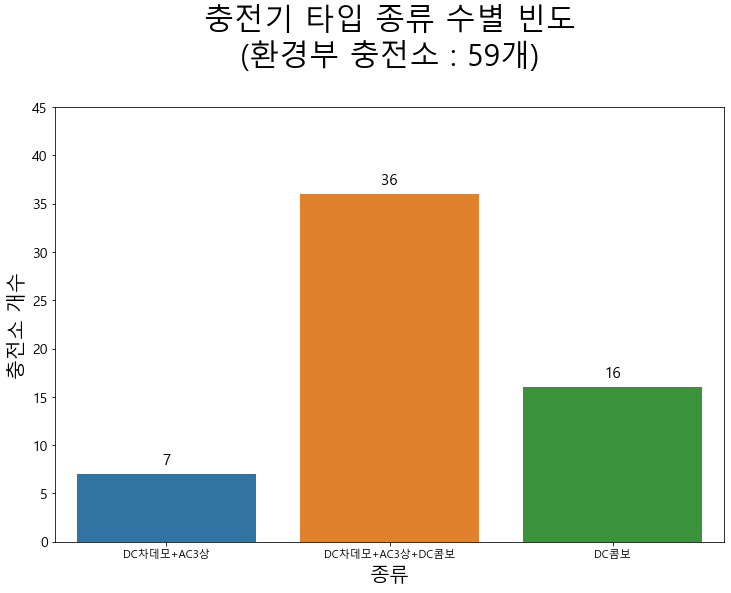

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

sns.barplot(x = '타입', y = '충&주', data = temp_graph)

plt.title("충전기 타입 종류 수별 빈도\n(환경부 충전소 : 59개)\n", fontsize = 30)
plt.xlabel('종류', fontsize = 20)
plt.ylabel('충전소 개수', fontsize = 20)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 14)
plt.ylim(0,45)

s = -1
for i in temp_graph['충&주'] :
    s += 1
    plt.annotate(str(i), xy = (s,i+1), ha = 'center', fontsize = 15 )

N = 2
fig = plt.gcf() #변경한 곳
plSize = fig.get_size_inches()
fig.set_size_inches( (plSize[0]*N, plSize[1]*N) )

plt.show()
fig.savefig('충전기타입별 빈도.jpg',  dpi=fig.dpi) #변경한 곳

In [142]:
tt2 = temp_type[temp_type['충전기타입'].isnull() != 0 ]
tt2 = tt2.drop_duplicates( ['충&주'], keep = 'first')
tt2.head(1)

,충&주,충전기타입
0,"강화지사/인천광역시 강화군 강화읍 강화대로 278 (갑곳리, 한국전력공사강화지점)",NaN


In [143]:
len(tt2)

25